## Tank Wars: An Extended Example

As an example, I will step through the development and coding process
for a game of tank wars. The rules of the game are as follows:


- The game is played between two people, each of which has a tank. 
- The two tanks are 1000 m apart, and are facing each other. 
- On a given turn, each sets the elevation angle of their cannon and the initial speed of
the shot to be fired. 
- Both tanks fire simultaneously. The distance (in meters) that the shot travels before hitting the ground is given by physics: distance= where the wind is traveling from left to right. 
- If a shot comes within 10 meters of any tank, then that tank is destroyed.
- If a tank is destroyed, then that player loses. If both tanks are destroyed in the same turn, then it is a stalemate. 
- The wind speed is a constant set in the program, and displayed at the beginning of the game.

### Writing the Recipe

So how do we begin to write such a program? We first write a recipe for
the program, mostly in English. Something like:


- Set Wind Speed 
- While No One Has Won 
    - Get Each Player's Angle and Speed
    - Get Where Each Shot Landed 
    - Display Where Each Shot Landed 
    - Determine Who Has Been Destroyed, If Anyone 
    - Determine Who Has Won, If Anyone
- Display Who Won

Some of these parts will translate easily into Python code, while others
will take some steps. Now let's go to the next stage of refinement.
Lines like Set Wind Speed can be translated directly as `wind_speed=5;`

The while-loop will look something like

```python
no_one_has_won=True
while (no_one_has_won):

    STUFF HERE.  WHEN SOMEONE WINS, OR A STALEMATE, THEN 
    WE WILL WRITE no_one_has_won=False
```

This is a very common structure for a while-loop, where you have a
variable which starts off true, and then is set to false when you want
to not continue repeating the while-loop.


### Designing the Functions

The line Get Each Player's Angle and Speed should be a set of two
statements Get Player 1's Angle and Speed and Get Player 2's Angle and
Speed. If we use a single function for this, we would want something
simply like `get_angle_and_speed`. What information does this function
need to be given? Just the player's number, 1 or 2. What information
does this function return? Two numbers: the angle and the speed. So we
should have something like

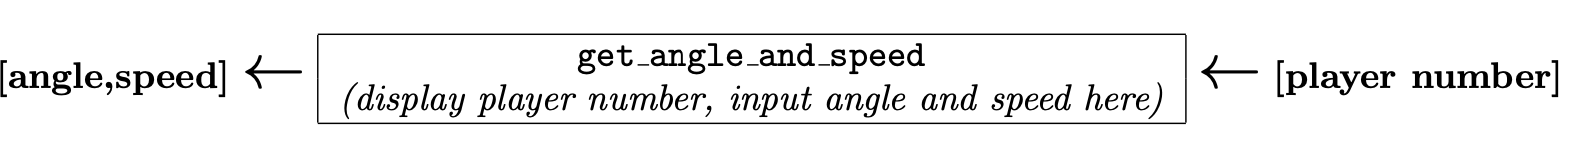


In [3]:
def get_angle_and_speed(player_number):

    print('Player ',player_number)
    angle=input('  Enter your Angle of Elevation: ')
    speed=input('  Enter your Angle of Speed: ')

    return angle,speed

Right now this doesn't check to see if the velocity is above zero, or
the elevation is between 0 and 90 degrees, but this can be added easily.

In [6]:
def get_angle_and_speed(player_number):

    print('Player ',player_number)
    angle=float(input('Enter your Angle of Elevation: '))

    if (angle<0) or (angle>90): # illegal angles
        raise ValueError("Illegal Angle Given")

    speed=float(input('Enter your Angle of Speed: '))

    if speed<0:
        raise ValueError("Illegal Speed Given")


    return angle,speed

Now we test this function, using several values of the player number,
and also testing the illegal values of angles and speeds.

In [7]:
angle1,speed1=get_angle_and_speed(1)

Player  1


Enter your Angle of Elevation:  45
Enter your Angle of Speed:  100


In [9]:
angle1,speed1

(45.0, 100.0)

In [10]:
angle2,speed2=get_angle_and_speed(2)

Player  2


Enter your Angle of Elevation:  145


ValueError: Illegal Angle Given

In [11]:
angle2,speed2=get_angle_and_speed(2)

Player  2


Enter your Angle of Elevation:  45
Enter your Angle of Speed:  50


In [12]:
angle2,speed2=get_angle_and_speed(2)

Player  2


Enter your Angle of Elevation:  45
Enter your Angle of Speed:  -50


ValueError: Illegal Speed Given

Continuing our program, we need a function to Get Where Each Shot
Landed. Again, we split this into Get Where Player 1's Shot Landed and
Get Where Player 2's Shot Landed, again as a single function. Since this
function does not need to print anything, it doesn't need to know who
the player is. It just needs the angle of elevation, the shot speed, and
the wind speed. It will then return the distance, so it should look like

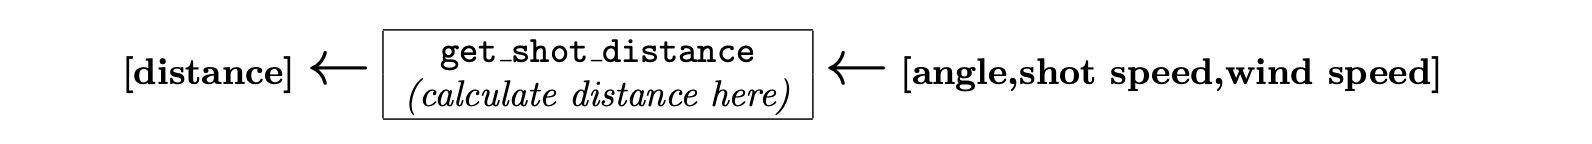

Now, in Python, all trigonometric functions are given in *radians*, not
*degrees*. We will have to translate from degrees to radians to use the
equation for the distance. This calls for another function, that is
given an angle in degrees and returns the value in radians.


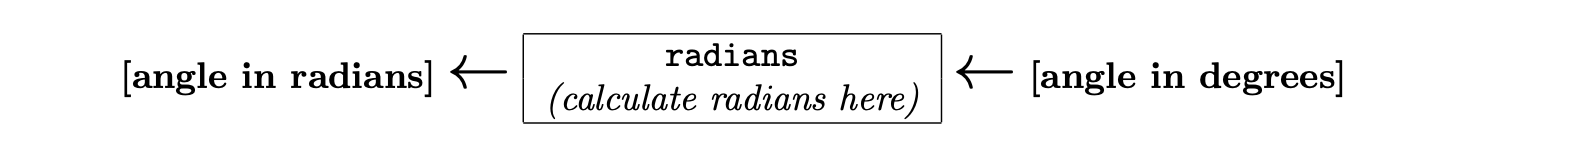

In [13]:
def radians(d):
    r=d*3.1415926535897932/180
    return r

Test this function knowing that 0 degrees is 0 radians, 180 degrees is
$\pi$ radians, and 360 degrees is $2\pi$ radians.

In [14]:
radians(0)

0.0

In [15]:
radians(180)

3.141592653589793

In [16]:
radians(360)

6.283185307179586

Now we are ready to make our `get_shot_distance` function.

In [19]:
def get_shot_distance(angle,shot_speed,wind_speed):
    from math import sin
    
    angle=radians(angle)
    distance=(shot_speed**2*sin(2*angle)+2*wind_speed*shot_speed*sin(angle))/10

    return distance

To test this function, we should desk-check a few values. We can also do
a couple of cases like shooting straight up with no wind, shooting
straight up with a wind, shooting at an angle of 0, or a velocity of 0.

In [20]:
get_shot_distance(90,20,0) # really small value (effectively zero)

4.898587196589413e-15

In [21]:
get_shot_distance(90,20,10) # wind pushes the shot forward

40.00000000000001

In [22]:
get_shot_distance(90,20,-10)  # wind pushes the shot backward

-39.99999999999999

In [23]:
get_shot_distance(0,20,10)  # hits the ground immediately

0.0

In [24]:
get_shot_distance(45,0,10) # hits the ground immediately

0.0

Our program now looks like

```python
    wind_speed=5

    no_one_has_won=True
    while no_one_has_won:

        angle1,speed1=get_angle_and_speed(1)
        angle2,speed2=get_angle_and_speed(2)
        
        distance1=get_shot_distance(angle1,speed1,wind_speed)
        distance2=get_shot_distance(angle2,speed2,-wind_speed)
        
        MORE STUFF  
```

Notice that we used `-wind_speed` for player 2, because it experiences
the opposite wind pattern. Now we have to display these distances, using
` print` statements, and determine a winner. The function to determine a
winner should take the two distance values, and return one of 4 values.
0: no one hit anything, 1: player one won, 2: player two won, 3: both
destroyed.

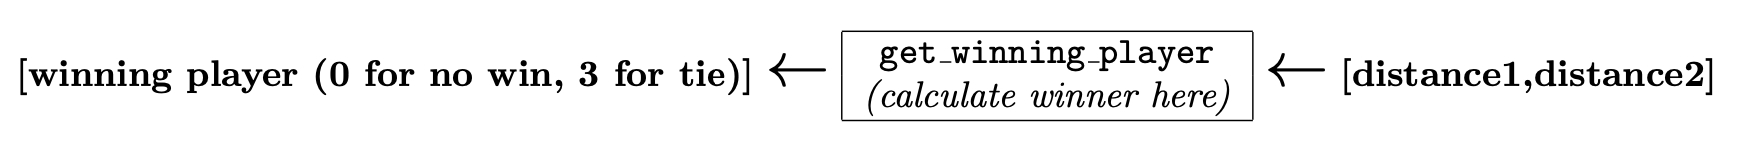


In [25]:
def get_winning_player(distance1,distance2):

    tank_1_hit=(distance2>=990) and (distance2<=1010)
    tank_2_hit=(distance1>=990) and (distance1<=1010)

    if tank_1_hit and tank_2_hit:
        winning_player=3  # stalemate
    elif tank_1_hit: # only tank 1 hit
        winning_player=2
    elif tank_2_hit: # only tank 2 hit
        winning_player=1
    else: # no tanks hit
        winning_player=0

    return winning_player


Again we test with a range of values, especially those on the extremes
(990 and 1010).

In [26]:
get_winning_player(500,500)

0

In [28]:
get_winning_player(1001,500)

1

In [29]:
get_winning_player(1010,500)

1

In [31]:
get_winning_player(1010,500)

1

In [32]:
get_winning_player(1011,990)

2

In [33]:
get_winning_player(1010,990)

3

### The Final Program

Adding a few display statements, and an if-statement to determine what
message to print, we have a complete program.  Notice that the functions and variables are named in such a way that the final program looks a lot like the recipe.


In [34]:
wind_speed=5

print('The wind speed is ',wind_speed)

no_one_has_won=True

while no_one_has_won:

    angle1,speed1=get_angle_and_speed(1)
    angle2,speed2=get_angle_and_speed(2)

    distance1=get_shot_distance(angle1,speed1,wind_speed)
    distance2=get_shot_distance(angle2,speed2,-wind_speed)

    print('Player 1 Shot a Distance of ',distance1)
    print('Player 2 Shot a Distance of ',distance2)

    winning_player=get_winning_player(distance1,distance2)

    if (winning_player>0):
        no_one_has_won=False

if winning_player==1:
    print('Player 1 Won!')
elif winning_player==2:
    print('Player 2 Won!')
else:
    print('Stalemate.')

The wind speed is  5
Player  1


Enter your Angle of Elevation:  45
Enter your Angle of Speed:  40


Player  2


Enter your Angle of Elevation:  30
Enter your Angle of Speed:  100


Player 1 Shot a Distance of  188.2842712474619
Player 2 Shot a Distance of  816.0254037844386
Player  1


Enter your Angle of Elevation:  45
Enter your Angle of Speed:  150


Player  2


Enter your Angle of Elevation:  30
Enter your Angle of Speed:  210


Player 1 Shot a Distance of  2356.0660171779823
Player 2 Shot a Distance of  3714.1720306893744
Player  1


Enter your Angle of Elevation:  45
Enter your Angle of Speed:  110


Player  2


Enter your Angle of Elevation:  30
Enter your Angle of Speed:  50


Player 1 Shot a Distance of  1287.7817459305202
Player 2 Shot a Distance of  191.50635094610965
Player  1


Enter your Angle of Elevation:  45
Enter your Angle of Speed:  97


Player  2


Enter your Angle of Elevation:  30
Enter your Angle of Speed:  115


Player 1 Shot a Distance of  1009.4893577750951
Player 2 Shot a Distance of  1087.8185965049202
Player 1 Won!


> **Exercise** Create the following computer game: The computer randomly selects an integer between 1 and 100. The user has to guess the number in the fewest number of tries. After each guess, the computer tells you whether the guess is too high or too low. At the end of the game print out the number of guesses it took. After each game, the user has the option of continuing with another game. **Make sure to write a recipe for the program before you write any Python code, and include it with your program.**

> **Exercise** Make the same game, but this time have the human pick the number, and the computer guesses. The computer should need no more than 8 guesses to win.